In [1]:
"""
Initially, the model was trained using all available features (~36 columns),
including some redundant features and some whose data was not consistently
available at inference time. With this setup, the model achieved an accuracy
of approximately 89–91%.

After further analysis, I performed feature engineering to remove unnecessary
features and merge overlapping ones. The dataset was reduced to 18 carefully
selected features that are meaningful, important, and consistently available
in real-world scenarios. With this refined feature set, the model achieved a
slightly lower accuracy of around 88–89%.

Conclusion:
Although there is a small drop in accuracy, the final model is more robust,
generalizable, and suitable for production use. Prioritizing feature quality,
availability, and simplicity over marginal accuracy gains leads to a more
reliable and maintainable machine learning solution. This process highlights
the importance of thoughtful feature engineering over blindly increasing
feature count.
"""

'\nInitially, the model was trained using all available features (~36 columns),\nincluding some redundant features and some whose data was not consistently\navailable at inference time. With this setup, the model achieved an accuracy\nof approximately 89–91%.\n\nAfter further analysis, I performed feature engineering to remove unnecessary\nfeatures and merge overlapping ones. The dataset was reduced to 18 carefully\nselected features that are meaningful, important, and consistently available\nin real-world scenarios. With this refined feature set, the model achieved a\nslightly lower accuracy of around 88–89%.\n\nConclusion:\nAlthough there is a small drop in accuracy, the final model is more robust,\ngeneralizable, and suitable for production use. Prioritizing feature quality,\navailability, and simplicity over marginal accuracy gains leads to a more\nreliable and maintainable machine learning solution. This process highlights\nthe importance of thoughtful feature engineering over bli

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load featured data
DATA_PATH = "../data/cleaned-data.csv"
df = pd.read_csv(DATA_PATH)
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [4]:
# Initial Data Exploration
print(df.shape)
print(df.info())

(3630, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification        

In [5]:
# Target Variable Distribution
target_col = "Target"

print(df[target_col].value_counts())

Target
1    2209
0    1421
Name: count, dtype: int64


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


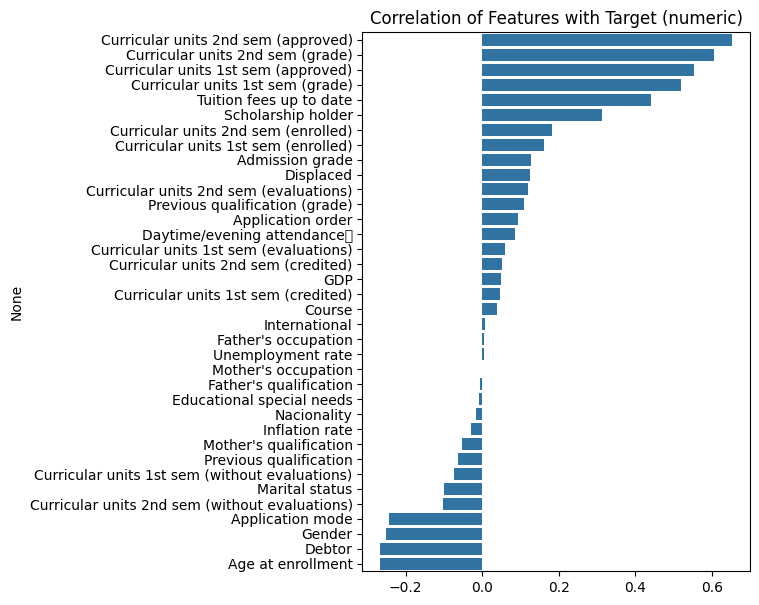

Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (enrolled)               0.161074
Admission grade                                   0.128058
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119239
Previous qualification (grade)                    0.109464
Application order                                 0.094355
Daytime/evening attendance\t                      0.084496
Curricular units 1st sem (evaluations)            0.059786
Curricular units 2nd sem (credited)               0.052402
GDP                                               0.0502

In [6]:
# correlations only among numeric columns and numeric target
corr = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)

# drop self-correlation entry
corr = corr.drop(target_col)

plt.figure(figsize=(5,7))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Features with Target (numeric)")
plt.show()

corr

In [7]:
# Drop Macro-economic columns
macro_cols = ['Unemployment rate', 'Inflation rate', 'GDP', 'Nacionality', 'International']
df = df.drop(columns=macro_cols)

In [8]:
# Drop Family background columns
family_cols = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
df = df.drop(columns=family_cols)

In [9]:
# Drop Redundant Academic Features
academic_redundant = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)',
    'Application order',
    'Application mode',
    'Course',
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)'
]
df = df.drop(columns=academic_redundant)

In [10]:
# Featured dataset preview
df.head()

,Marital status,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,1,1,122.0,127.3,1,0,0,1,1,0,20,0,0.000000,0,0.000000,0,0
1,1,1,1,160.0,142.5,1,0,0,0,1,0,19,6,14.000000,6,13.666667,0,1
2,1,1,1,122.0,124.8,1,0,0,0,1,0,19,0,0.000000,0,0.000000,0,0
3,1,1,1,122.0,119.6,1,0,0,1,0,0,20,6,13.428571,5,12.400000,0,1
4,2,0,1,100.0,141.5,0,0,0,1,0,0,45,5,12.333333,6,13.000000,0,1


In [11]:
# Featured data exploration
print(df.shape)
print(df.info())

(3630, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Daytime/evening attendance	                     3630 non-null   int64  
 2   Previous qualification                          3630 non-null   int64  
 3   Previous qualification (grade)                  3630 non-null   float64
 4   Admission grade                                 3630 non-null   float64
 5   Displaced                                       3630 non-null   int64  
 6   Educational special needs                       3630 non-null   int64  
 7   Debtor                                          3630 non-null   int64  
 8   Tuition fees up to date                         3630 non-null   int64  
 9   Gender                        

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


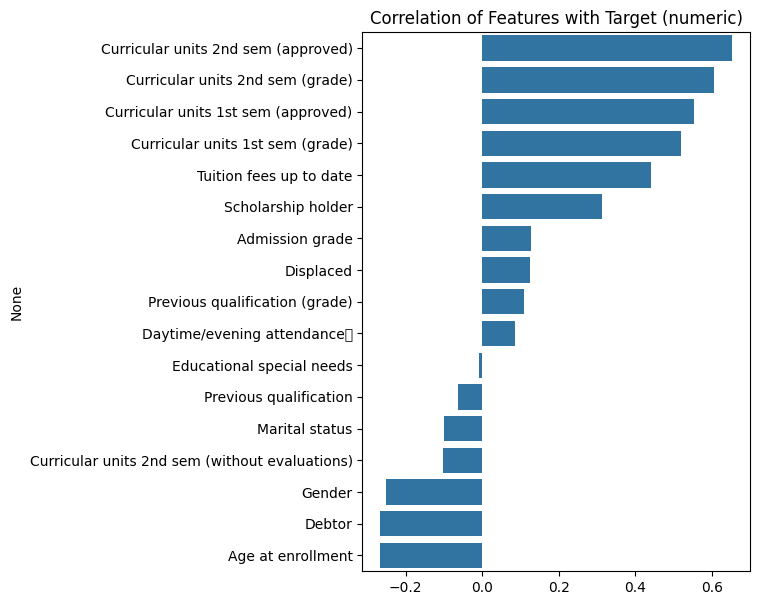

Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Admission grade                                   0.128058
Displaced                                         0.126113
Previous qualification (grade)                    0.109464
Daytime/evening attendance\t                      0.084496
Educational special needs                        -0.007254
Previous qualification                           -0.062323
Marital status                                   -0.100479
Curricular units 2nd sem (without evaluations)   -0.102687
Gender                                           -0.251955
Debtor                                           -0.267207
Age at enrollment                                -0.2672

In [12]:
# featured data correlations 
corr = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)

# drop self-correlation entry
corr = corr.drop(target_col)

plt.figure(figsize=(5,7))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Correlation of Features with Target (numeric)")
plt.show()

corr

In [13]:
# save to data folder
df.to_csv("../data/featured-data.csv", index=False)